# Investigando um conjunto de dados: RMS Titanic

O [RMS Titanic](https://pt.wikipedia.org/wiki/RMS_Titanic) foi um navio de passageiros construído em 1911 pela companhia britânica de transportes [White Star Line](https://pt.wikipedia.org/wiki/White_Star_Line), projetado para ser extremanente seguro e luxuoso.
Em 1912 o navio saiu de  Southampton para Nova Iorque, passando por Cherbourg na França e Queenstown na Irlanda. Porém o navio colidiu com um iceberg durante a viagem e acabou naufragando no oceano Atlântico. Estima-se que 1500 pessoas estavam a bordo no momento do acidente.

## Origem do conjunto de dados

Este conjunto de dados pode ser encontrado na [Kaggle](https://www.kaggle.com/c/titanic/data) (uma comunidade online para cientistas de dados) e faz parte do projeto final do [Nanodegree de Fundamentos de Data Science I](https://br.udacity.com/course/python-fundamentos-data-science--nd110) da [Udacity](https://br.udacity.com). Temos aqui dados demográficos sobre 891 passageiros que estavam a bordo do navio RMS Titanic no momento do desastre marítimo. Com base nestes dados, levantarei algumas perguntas e suas respecitivas respostas.

## Sobre os dados disponíveis

Segue uma breve descrição de cada coluna do conjunto de dados:
- **PassengerId**: identificador único do passageiro
- **Survived**: indicador de sobrevivência
- **Pclass**: status socioeconômico (1 = alto, 2 = médio, 3 = baixo)
- **Name**: nome do passageiro
- **Sex**: sexo do passageiro
- **Age**: idade do passageiro (a idade é fracionária se menor que 1. Se a idade é estimada, está no formato xx.5)
- **SibSp**: número de irmãos e cônjuges abordo
- **Parch**: número de pais/filhos abordo
- **Ticket**: número da passagem
- **Fare**: taxa do passageiro
- **Cabin**: número da cabine
- **Embarked**: local de embarque

## Lista de perguntas

1. Quantos passageiros embarcaram por porto?
2. Quantas pessoas sobreviveram ao naufrágio?
3. Quantos sobreviventes são do sexo masculino? Quantos são do sexo feminino?
4. Qual a taxa de sobreviventes por status socioeconômico?
5. Qual era a tarifa mais cara? Qual era a mais barata? Qual era a média de tarifas?
6. Qual é a média de idade dos sobreviventes?
7. Qual o valor médio da tarifa para cada classe?
8. Qual a média de idade das mulheres em cada classe do navio?
9. Qual a média de idade dos homens em cada classe do navio?
10. Quantos passageiros viajavam desacompanhados de membros da família?

## Índice

- [Breve análise dos dados](#Breve-análise-dos-dados)
- [Limpeza de dados](#Limpeza-de-dados)
- [Perguntas e respostas](#Perguntas-e-respostas)
- [Conclusão](#Conclusão)
- [Limitações](#Limitações)

## Breve análise dos dados

In [179]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic-data-6.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Informações gerais
Nota-se que temos 891 dados sobre passageiros e 12 colunas no conjunto de dados, bem como alguns valores nulos para as colunas "age", "cabin" e "embarked".

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Tipos de dados de cada coluna
Nota-se que não é necessário fazer nenhuma mudança nos tipos de dados das colunas, pois já possuem um tipo apropriado para o dado que armazenam.

In [181]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Limpeza de dados

### Renomear as colunas para o padrão snake case

Lista de colunas atuais:

In [182]:
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Renomeando as colunas para o padrão snake case:

In [183]:
df.rename(columns={'PassengerId': 'passenger_id', 'Survived': 'survived', 'Pclass': 'p_class', 'Name': 'name', 'Sex': 'sex', 'SibSp': 'sib_sp', 'Age': 'age', 'Parch': 'parch', 'Ticket': 'ticket', 'Fare': 'fare', 'Cabin': 'cabin', 'Embarked': 'embarked'}, inplace=True)
list(df)

['passenger_id',
 'survived',
 'p_class',
 'name',
 'sex',
 'age',
 'sib_sp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked']

In [184]:
df_dimensions = df.shape
print('O conjunto de dados possui {} linhas e {} colunas.'.format(df_dimensions[0], df_dimensions[1]))

O conjunto de dados possui 891 linhas e 12 colunas.


### Verificar e limpar valores nulos/faltantes

In [185]:
df.isnull().any()

passenger_id    False
survived        False
p_class         False
name            False
sex             False
age              True
sib_sp          False
parch           False
ticket          False
fare            False
cabin            True
embarked         True
dtype: bool

Conforme os dados acina, pode-se observar que as colunas "age", "cabin" e "embarked" possuem valores nulos, portanto precisamos removê-los.

In [186]:
df.dropna(inplace=True, how='any')
df.isnull().sum().any()

False

Como indicado acima, não existe mais nenhum valor nulo no conjunto de dados.

### Verificar e limpar valores duplicados

In [187]:
duplicated = df.duplicated().sum()
print('Existem {} valores duplicados neste conjunto de dados.'.format(duplicated))

Existem 0 valores duplicados neste conjunto de dados.


Como não existem valores duplicados, não há necessidade de limpá-los.

### Assinalar valores mais legíveis para as colunas "survived" e "embarked"

#### Coluna "survived"
Trocaremos os valores 1 e 0 por "yes" e "no", respectivamente.

In [188]:
df['survived'].unique()

array([1, 0])

In [189]:
df['survived'].replace([1, 0], ['yes', 'no'], inplace=True)
df['survived'].unique()

array(['yes', 'no'], dtype=object)

#### Coluna "embarked"
Trocaremos as iniciais das cidades ponto de embarcação por seus nomes completos.

In [190]:
df['embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [191]:
df['embarked'].replace(['C', 'S', 'Q'], ['Cherbourg', 'Southampton', 'Queenstown'], inplace=True)
df['embarked'].unique()

array(['Cherbourg', 'Southampton', 'Queenstown'], dtype=object)

### Criar coluna para parentes
Para deixar os dados mais consistentes, vamos juntas as colunas "sib_sp" e "parch" em uma só coluna que represente o número de parentes que viajou junto com a pessoa.

In [192]:
relatives_column = df[['sib_sp', 'parch']].dot([1, 1])
df['relatives'] = relatives_column
df.drop(columns=['sib_sp', 'parch'], inplace=True)

### Visão geral do conjunto de dados pós-limpeza

In [193]:
df.head()

,passenger_id,survived,p_class,name,sex,age,ticket,fare,cabin,embarked,relatives
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,Cherbourg,1
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,Southampton,1
6,7,no,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,Southampton,0
10,11,yes,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,PP 9549,16.7000,G6,Southampton,2
11,12,yes,1,"Bonnell, Miss. Elizabeth",female,58.0,113783,26.5500,C103,Southampton,0


In [194]:
df_dimensions_clean = df.shape
print('O conjunto de dados possui {} linhas e {} colunas após a limpeza.'.format(df_dimensions_clean[0], df_dimensions_clean[1]))

O conjunto de dados possui 183 linhas e 11 colunas após a limpeza.


## Perguntas e respostas

In [195]:
def create_chart(c_type, c_data, c_labels, c_colors, c_title, c_x_label, c_y_label):
    """
    Cria um gráfico conforme o tipo e dados informados.
    Argumentos:
        c_type: Tipo de gráfico.
        c_data: Dados para gerar o gráfico.
        c_labels: Rótulos dos dados do gráfico.
        c_colors: Array de cores para o gráfico.
        c_title: Título do gráfico.
    Retorna:
        Um gráfico.
    """
    if(c_type == 'pie'):
        fig, ax = plt.subplots()
        ax.pie(c_data, labels=c_labels, autopct='%1.1f%%', startangle=90, colors=c_colors)
        ax.axis('equal')
        ax.set_title(c_title, pad=15)
        plt.show()
    elif(c_type == 'bar'):
        index = np.arange(len(c_labels))
        plt.bar(index, c_data, align='center', alpha=0.75, color=c_colors)
        plt.xlabel(c_x_label)
        plt.ylabel(c_y_label)
        plt.xticks(index, c_labels)
        plt.title(c_title)
        plt.show()
    else:
        return 'Este tipo de gráfico não é suportado. Tente "bar" ou "pie".'

#### 1. Quantos passageiros embarcaram por porto?

In [196]:
num_embarked = df['embarked'].value_counts()
print('Embarques por porto:\n\nSouthampton: {}\nCherbourg: {}\nQueenstown: {}'.format(num_embarked[0], num_embarked[1], num_embarked[2]))

Embarques por porto:

Southampton: 116
Cherbourg: 65
Queenstown: 2


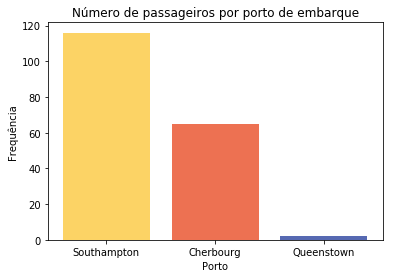

In [197]:
count_cities = num_embarked.values
labels = num_embarked.index.values
create_chart('bar', count_cities, labels, ['#fbc531', '#e84118', '#1e3799'], 'Número de passageiros por porto de embarque', 'Porto', 'Frequência')

Conforme o gráfico acima, pode-se notar que o porto de Southampton na Inglaterra obteve o maior número de embarques seguido de Cherbourg na França e, por fim, Queenstown na Irlanda com apenas 2 embarques registrados.

#### 2. Quantas pessoas sobreviveram ao naufrágio?

In [198]:
num_survivors = df[df['survived']=='yes'].count()[0]
num_deceased = df.shape[0] - num_survivors
print('De {} pessoas, {} sobreviveram ao naufrágio e {} faleceram.'.format(df.shape[0], num_survivors, num_deceased))

De 183 pessoas, 123 sobreviveram ao naufrágio e 60 faleceram.


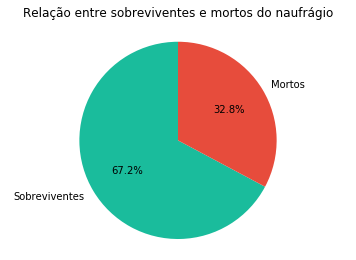

In [199]:
num_survivors_deceased = np.array([num_survivors, num_deceased])
labels = ['Sobreviventes', 'Mortos']
create_chart('pie', num_survivors_deceased, labels, ['#1abc9c', '#e74c3c'], 'Relação entre sobreviventes e mortos do naufrágio', '', '')

Conforme o gráfico acima, nota-se que 67.2% dos passageiros sobreviveram ao desastre marítimo e 32.8% faleceram.

#### 3. Quantos sobreviventes são do sexo masculino? Quantos são do sexo feminino?

In [200]:
num_male_survivors = df[(df['survived']=='yes') & (df['sex']=='male')].count()[0]
print('De {} sobreviventes, {} são do sexo masculino.'.format(num_survivors, num_male_survivors))

De 123 sobreviventes, 41 são do sexo masculino.


In [201]:
num_female_survivors = df[(df['survived']=='yes') & (df['sex']=='female')].count()[0]
print('De {} sobreviventes, {} são do sexo feminino.'.format(num_survivors, num_female_survivors))

De 123 sobreviventes, 82 são do sexo feminino.


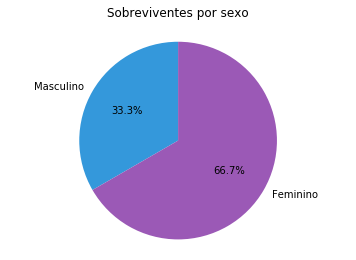

In [202]:
num_survivors_sex = np.array([num_male_survivors, num_female_survivors])
labels = ['Masculino', 'Feminino']
create_chart('pie', num_survivors_sex, labels, ['#3498db', '#9b59b6'], 'Sobreviventes por sexo', '', '')

Conforme o gráfico acima, nota-se que 66.7% dos sobreviventes são do sexo feminino enquanto 33.3% são do sexo masculino.

#### 4. Qual a taxa de sobreviventes por status socioeconômico?

In [203]:
num_first_survivors = df[(df['survived']=='yes') & (df['p_class']==1)].count()[0]
print('De {} sobreviventes, {} são da primeira classe.'.format(num_survivors, num_first_survivors))

De 123 sobreviventes, 106 são da primeira classe.


In [204]:
num_second_survivors = df[(df['survived']=='yes') & (df['p_class']==2)].count()[0]
print('De {} sobreviventes, {} são da segunda classe.'.format(num_survivors, num_second_survivors))

De 123 sobreviventes, 12 são da segunda classe.


In [205]:
num_third_survivors = df[(df['survived']=='yes') & (df['p_class']==3)].count()[0]
print('De {} sobreviventes, {} são da terceira classe.'.format(num_survivors, num_third_survivors))

De 123 sobreviventes, 5 são da terceira classe.


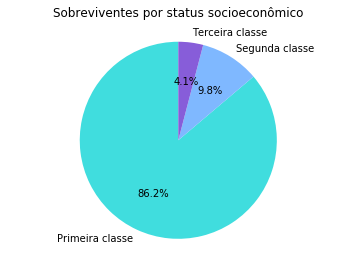

In [206]:
num_survivors_class = np.array([num_first_survivors, num_second_survivors, num_third_survivors])
labels = ['Primeira classe', 'Segunda classe', 'Terceira classe']
create_chart('pie', num_survivors_class, labels, ['#40DDDE', '#7FB8FF', '#875DD9'], 'Sobreviventes por status socioeconômico', '', '')

Conforme o gráfico acima, nota-se que 86.2% dos sobreviventes são da terceira classe, 9.8% são da segunda classe e apenas 4.1% são da terceira classe.

#### 5. Qual era a tarifa mais cara? Qual era a mais barata? Qual era a média de tarifas?

In [207]:
num_fare_survived = df_survived['fare']
max_fare_survived = round(num_fare_survived.max(), 2)
min_fare_survived = round(num_fare_survived.min(), 2)
mean_fare_survived = round(num_fare_survived.values.mean(), 2)
print('A taxa mais cara paga foi USD {}. A mais barta foi USD {}. A média das tarifas foi USD {}.'.format(max_fare_survived, min_fare_survived, mean_fare_survived))

A taxa mais cara paga foi USD 512.33. A mais barta foi USD 8.05. A média das tarifas foi USD 85.82.


#### 6. Qual é a média de idade dos sobreviventes?

In [208]:
df_survived = df[(df['survived']=='yes')]
num_age_survived = df_survived['age']
mean_survivor_age = num_age_survived.values.mean()
print('A idade média dos sobreviventes é {} anos.'.format(int(mean_survivor_age)))

A idade média dos sobreviventes é 32 anos.


#### 7. Qual o valor médio da tarifa para cada classe?

In [209]:
df_first = df[df['p_class']==1]
first_fare = df_first['fare']
mean_first_fare = round(first_fare.values.mean(), 2)

df_second = df[df['p_class']==2]
second_fare = df_second['fare']
mean_second_fare = round(second_fare.values.mean(), 2)

df_third = df[df['p_class']==3]
third_fare = df_third['fare']
mean_third_fare = round(third_fare.values.mean(), 2)

print('Tarifa média por classe:\n\nPrimeira: USD {}\nSegunda: USD {}\nTerceira: USD {}'.format(mean_first_fare, mean_second_fare, mean_third_fare))

Tarifa média por classe:

Primeira: USD 88.68
Segunda: USD 18.44
Terceira: USD 11.03


#### 8. Qual a média de idade das mulheres em cada classe do navio?

In [210]:
df_women = df[df['sex']=='female']
df_women_first = df_women[df_women['p_class']==1]
mean_women_first = int(df_women_first['age'].values.mean())

df_women_second = df_women[df_women['p_class']==2]
mean_women_second = int(df_women_second['age'].values.mean())

df_women_third = df_women[df_women['p_class']==3]
mean_women_third = int(df_women_third['age'].values.mean())

print('Idade média das mulheres por classe do navio:\n\nPrimeira: {}\nSegunda: {}\nTerceira: {}'.format(mean_women_first, mean_women_second, mean_women_third))

Idade média das mulheres por classe do navio:

Primeira: 34
Segunda: 29
Terceira: 17


#### 9. Qual a média de idade dos homens em cada classe do navio?

In [211]:
df_men = df[df['sex']=='male']
df_men_first = df_men[df_men['p_class']==1]
mean_men_first = int(df_men_first['age'].values.mean())

df_men_second = df_men[df_men['p_class']==2]
mean_men_second = int(df_men_second['age'].values.mean())

df_men_third = df_men[df_men['p_class']==3]
mean_men_third = int(df_men_third['age'].values.mean())

print('Idade média dos homens por classe do navio:\n\nPrimeira: {}\nSegunda: {}\nTerceira: {}'.format(mean_men_first, mean_men_second, mean_men_third))

Idade média dos homens por classe do navio:

Primeira: 40
Segunda: 18
Terceira: 24


#### 10. Quantos passageiros viajavam desacompanhados de membros da família?

In [226]:
num_alone = df[df['relatives']==0].count()[0]
num_accompanied = df[df['relatives']!=0].count()[0]
print('{} passageiros viajavam desacompanhados de membros da família equanto {} viajavam acompanhados.'.format(num_alone, num_accompanied))

79 passageiros viajavam desacompanhados de membros da família equanto 104 viajavam acompanhados.


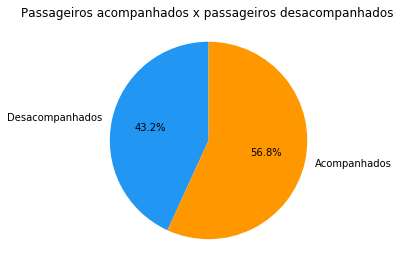

In [227]:
num_passengers_relatives = np.array([num_alone, num_accompanied])
labels = ['Desacompanhados', 'Acompanhados']
create_chart('pie', num_passengers_relatives, labels, ['#2196F3', '#FF9800'], 'Passageiros acompanhados x passageiros desacompanhados', '', '')

Conforme o gráfico acima, nota-se que 56.8% dos passageiros viajavam acompanhados de algum membro de sua família enquanto 43.2% viajavam desacompanhados dos mesmos.

## Conclusão
Nota-se que a grande maioria dos sobreviventes são da primeira classe e do sexo feminino. Apenas 4.1% dos sobreviventes são da terceira classe e apenas 33.3% são do sexo masculino. No total, 67.2% dos passageiros sobreviveram ao naufrágio.

## Limitações
Foi possível notar que as colunas "age", "cabin" e "embarked" possuiam valores nulos. Para lidar com esta limitação, as linhas que continham estes valores foram removidas do conjunto de dados para as três colunas mencionadas.

As colunas "sib_sp" e "parch", que indicam o número de irmãos e pai/mãe que viajavam junto com um passageiro foram mescladas na coluna "relatives" para manter a consistência numa só coluna que indicasse o número de parentes que viajavam com a pessoa.